In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from itertools import combinations,chain

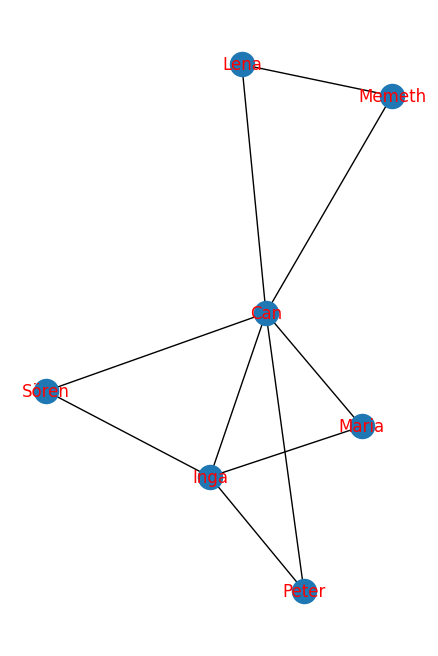

In [56]:
names = pd.read_csv('namen.csv')

pairs = list()
personen = list()
for i in names.index:
    n = [k for k in names.loc[i,:].values if pd.notnull(k)]
    personen += n
    pairs += [tuple(set(k)) for k in list(combinations(n, 2))]
pairs = {x:pairs.count(x) for x in pairs}

G = nx.Graph()
G.add_nodes_from(personen)
_ = [G.add_edge(k[0], k[1], weight=v) for k,v in pairs.items()]
pos = nx.spring_layout(G)

fig, ax = plt.subplots(1,1,figsize=(11.69,8.27))
nx.draw_networkx(G, pos, with_labels=True,ax=ax,font_color='red')
ax.set_aspect('equal')
plt.box(False)
fig.savefig("soziogramm.pdf")